# Curve Fits

We fit a linear function in the previous notebook. Let us **steal all that code** and repurpose it to fit the arbitrary function that defines the **Michaelis-Menten equation**.

## Non-linear Curve Fits

We can fit the x,y data to the asymptotic Michaelis-Menten equation and obtain $\rm K_M$ and $\rm V{max}$ using a least squares minimization.

$$ \nu = V_{max} \frac{[S]}{[S] + K_M}$$

Consider the code below.

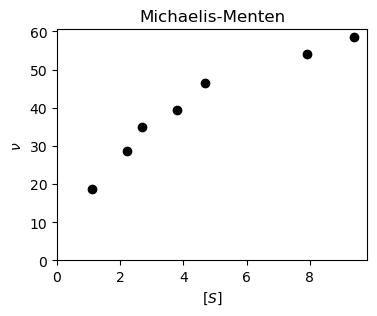

In [9]:
from matplotlib import pyplot as plt   ### load in the plotting tools from the MatPlotLib package
from scipy.optimize import curve_fit   ### load in the curve_fit function from the SciPy package
import numpy as np

### Set up the data lists

conc = [1.1, 2.2, 2.7, 3.8, 4.7, 7.9, 9.4]     ### units are mM
rates = [18.7, 28.6, 35.0,  39.4, 46.5, 54.1, 58.5]   ### units are uM/min

conc = np.array(conc)    ### Convert my lists into NumPy arrays
rates = np.array(rates)  ###  that can be used in math operations

### set x and y so that we never need to change the plotting code below

x = conc
y = rates

### Steal the code for plotting from the previous notebook

### Create blank plot
plt.rcdefaults()             ### resets the plot defaults so we always start in the same place
plt.figure(figsize=(4,3))    ### sets the size of the plot figure in inches

### Plot the data
plt.plot(x, y, "ko")         ### Plot the x and y data as black "k" circles "o"

### All the rest of these commands are about style
plt.xlim(0, None)            ### x-axis goes from 0 to limit of data
plt.ylim(0, None)            ### y-axis goes from 0 to limit of data

plt.title("Michaelis-Menten")   ### use a title
plt.xlabel(r"$[S]$")                 ### label the x-axis. r means "raw" text string. $-signs are commands for the Latex math language 
plt.ylabel(r"$\nu$")                 ### label y-axis. Here we use the greek letter nu for rate.

### Output the plot
plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot. The bbox parameter prevents labels from being cut off
plt.show()                                        ### display the plot in this notebook

## The Curve Fit

The plot above clearly is a curve. What **sparameters** would fit this data best? Let us perform a curve fit in the example below. Note the function definition. We must **define a function and then optimize the parameters** to fit the data.

**NOTE:** all this code is almost identical to the previous notebook.  **I stole it all**. Compare the linear fit notebook with this one and **observe where I made changes**. The major change is the function being defined for the curve fit. I also changed variable names to better describe what we are doing. That is all. 

In [10]:
def MM_fit(s, Vmax, KM):            ### a function that accepts a list of x values and values for slope and intercept
    v = Vmax * (s / (s + KM))       ### then calculates values for y
    return v                        ### and send then back as the result of the function

parameters, statistics = curve_fit(MM_fit, x, y)

Vmax, KM = parameters       ### the parameters contains slope and intercept, in order

perr = np.sqrt(np.diag(statistics)) ### the statistics object can be used to calculate standard deviations
Vmax_stdev, KM_stdev = perr       ### the standard errors for slope and intercept accessed in order

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326


## Add the Line

We now have values for slope and intercept. We will **visualize** this proposed line fit with the data. First we make a series of numbers from zero to the end of the x-axis data and then we use the slope and intercept to calculate the y-axis values according to our line fit. Then we steal the code for plotting the points and add an extra command to **plot the line**. Examine the code below.

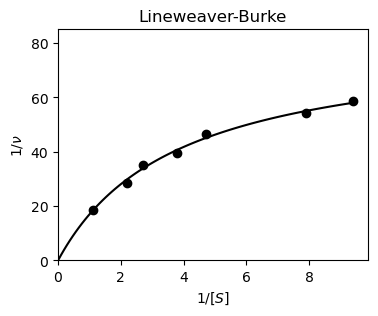

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326


In [11]:
#########################################
### Make a line using the calculate slope and intercept
#########################################

max_x = np.max(x)                        ### obtain the maximum x value
x_fit = np.linspace(0, max_x, 100)       ### Make an array of 100 points between zero and the max x value
y_fit = MM_fit(x_fit, Vmax, KM)  ### calculate the y values using the function that we curve fit

#########################################
### Steal the plotting code above and add a line to plot the line fit data
#########################################

### Create blank plot
plt.rcdefaults()             ### resets the plot defaults so we always start in the same place
plt.figure(figsize=(4,3))    ### sets the size of the plot figure in inches


#########################################
### This is the one change to the stolen code.
### Plot the line using the x_fit, y_fit points
#########################################

plt.plot(x_fit, y_fit, "k-")         ### Plot the x_fit and y_fit data as a black "k" line "-"

#########################################
#########################################


### Plot the data
plt.plot(x, y, "ko")            ### Plot the x and y data as black "k" circles "o"

### All the rest of these commands are about style
plt.xlim(0, None)               ### x-axis goes from 0 to limit of data
plt.ylim(0, 85)               ### y-axis goes from 0 to limit of data

plt.title("Michaelis-Menten")   ### use a title
plt.xlabel(r"$[S]$")                 ### label the x-axis. r means "raw" text string. $-signs are commands for the Latex math language 
plt.ylabel(r"$\nu$")                 ### label y-axis. Here we use the greek letter nu for rate.

### Output the plot
plt.savefig("plot.pdf", bbox_inches='tight') ### export the plot. The bbox parameter prevents labels from being cut off
plt.show()                                   ### display the plot in this notebook

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")

## The Fancy Version

I will **steal the code** for the more styled plot in the previous notebook and present the plot of data with the line fit again but with **more style**.

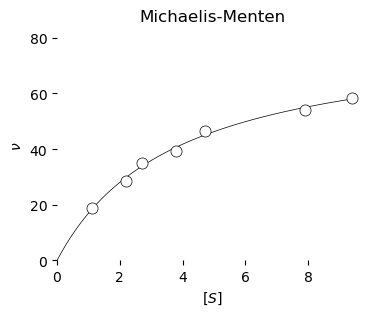

The Vmax is 81.538 +/- 3.1087
The KM is 3.809 +/- 0.3326


In [12]:
### More style examples

### Create blank plot
plt.rcdefaults()             ### resets the plot defaults so we always start in the same place
plt.figure(figsize=(4,3))    ### sets the size of the plot figure in inches


#########################################
### This is the one change.
### Plot the line using the x_fit, y_fit points
#########################################

plt.plot(x_fit, y_fit, 
        linestyle = '-',              ### use a line between points
        linewidth='0.5',              ### make the line thin
        color = 'black')              ### the line is black

#########################################
#########################################


### Plot the data with style
plt.plot(x, y, 
        marker='o',                   ### Plot the x and y data 
        linestyle = 'None',           ### no line between markers
        markerfacecolor='white',      ### markers and lines are this color
        markeredgecolor = 'black',    ### outline of markers is this color
        markeredgewidth = 0.5,        ### outline of markers is this wide
        markersize=8)                 ### markers are this big

### Add more style
plt.xlim(0, None)                  ### x-axis goes from 0 to 1
plt.ylim(0, 83)               ### y-axis goes from 0 to limit of data

plt.title("Michaelis-Menten")   ### use a title
plt.xlabel(r"$[S]$")                 ### label the x-axis. r means "raw" text string. $-signs are commands for the Latex math language 
plt.ylabel(r"$\nu$")                 ### label y-axis. Here we use the greek letter nu for rate.

plt.gca().spines['right'].set_visible(False)   ### Make right spine invisible
plt.gca().spines['top'].set_visible(False)     ### Make top spine invisible
plt.gca().spines['left'].set_visible(False)    ### Make left spine invisible
plt.gca().spines['bottom'].set_visible(False)  ### Make bottom spine invisible

### Output the plot
plt.savefig("plot.pdf")     ### export the plot as this
plt.show()                  ### display the plot in this notebook

print(f"The Vmax is {Vmax:0.3f} +/- {Vmax_stdev:0.4f}")
print(f"The KM is {KM:0.3f} +/- {KM_stdev:0.4f}")

## The Benefits of Theft

I took the code for the linear fits and made **one major change** (changed the function being fit) and several minor ones (variable names and labels). It took me 3 minutes to write a curve fit notebook for non-linear curve fits when I started with the **previous notebook** on linear fits. Steal freely, admit to it in detail, and give credit where credit is due. That is the way of science.